# Import

In [1]:


import utils


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import phik
from phik.report import plot_correlation_matrix








from sklearn.impute import SimpleImputer


df = pd.read_csv('/Users/mimi/Desktop/PYTHON/TURING/HOME/MachLearning/S2/data/archive (1).zip')
df.drop(columns=['id'], inplace=True)
df = df[df['gender'] != 'Other']
imputer = SimpleImputer(strategy="mean")
df['bmi'] = imputer.fit_transform(df[['bmi']])
df_ = df.copy()


df_.reset_index(drop=True,inplace=True)

stroke = df_[df_['stroke']== 1].reset_index(drop=True)
no_stroke = df_[df_['stroke']== 0].reset_index(drop=True)




df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.89456,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00000,never smoked,1


# EDA

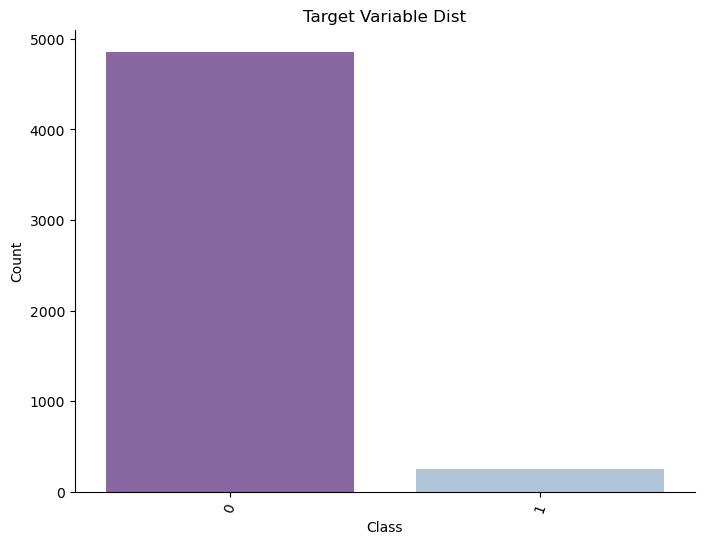

In [2]:
target_variable = 'stroke'

class_counts = df[target_variable].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='BuPu_r')  # Change the palette here
plt.title('Target Variable Dist')
plt.xlabel('Class')
plt.ylabel('Count')
sns.despine()
plt.xticks(rotation=70)
plt.show()

interval columns not set, guessing: ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']


<Axes: title={'center': 'PHICK Feature correlation matrix'}>

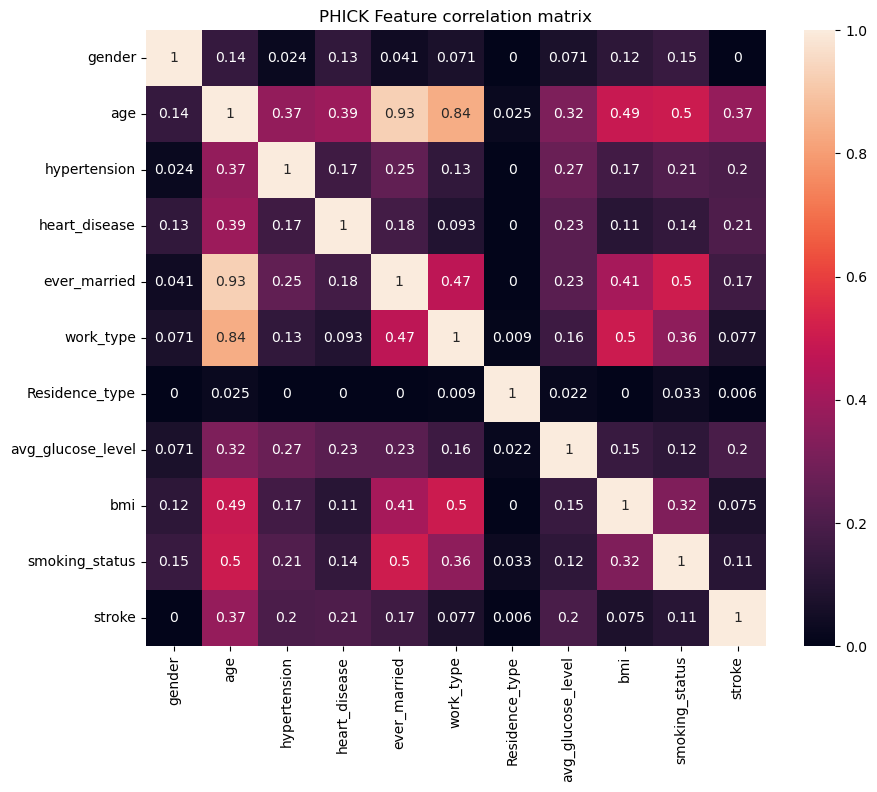

In [3]:
plt.figure(figsize=(10, 8))
plt.title("PHICK Feature correlation matrix")

sns.heatmap(df.phik_matrix(),annot=True)

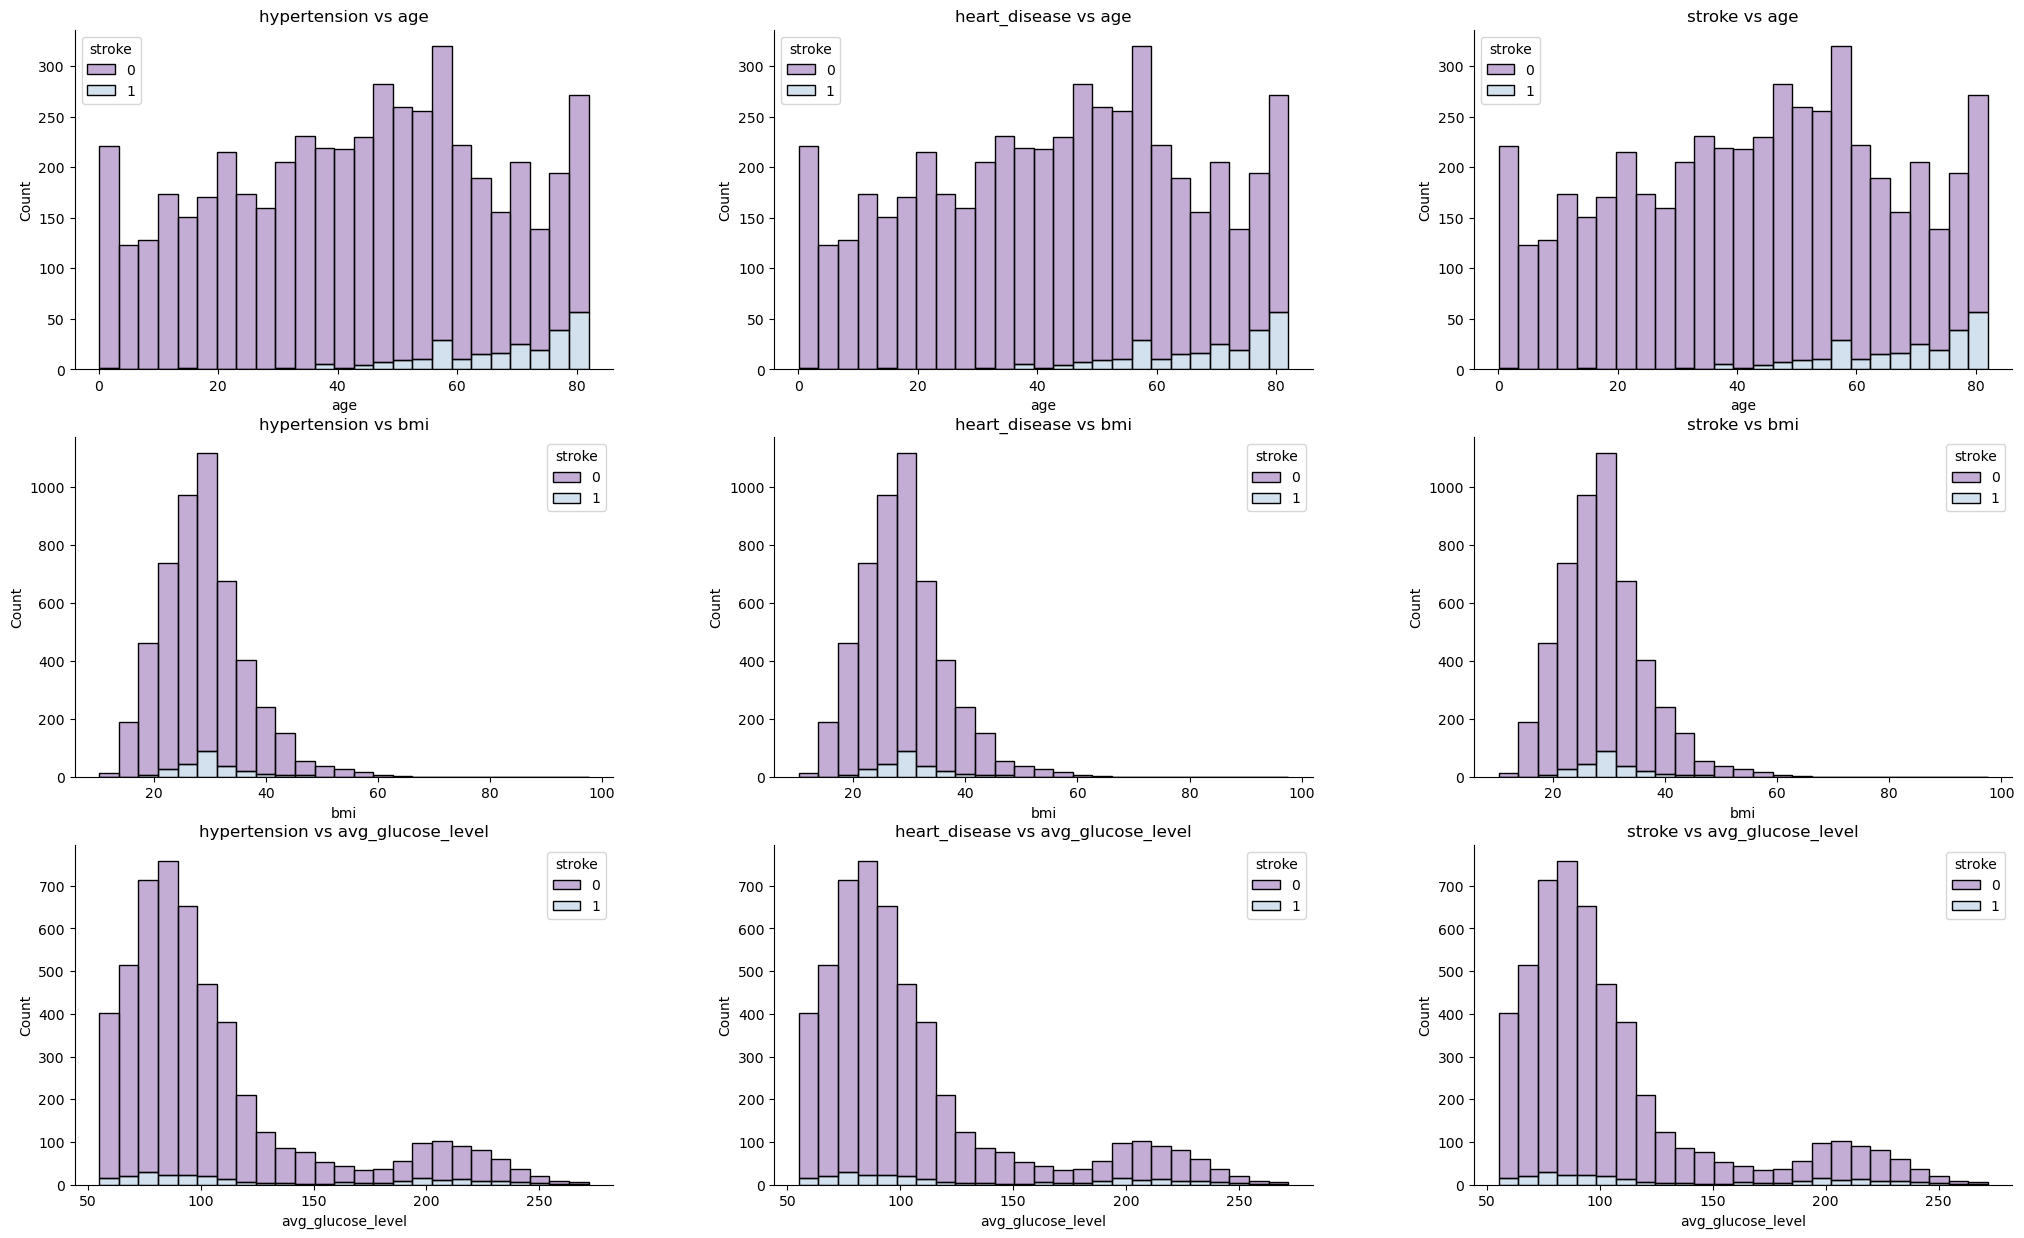

In [4]:
fig, ax = plt.subplots(3, 3, figsize=(25, 15))
fig.subplots_adjust(wspace=0.3)

features = ["age", "bmi", "avg_glucose_level"]
conditions = ["hypertension", "heart_disease", "stroke"]

for i, feat in enumerate(features):
    for j, cond in enumerate(conditions):
        axi = ax[i, j]
        sns.histplot(
            data=df,
            x=feat,
            hue='stroke',
            alpha=0.5,
            multiple="stack",
            bins=25,
            palette="BuPu_r",
            ax=axi,
        )
        axi.set_title(f"{cond} vs {feat}")
        axi.set_xlabel(feat)

sns.despine()    
plt.show()

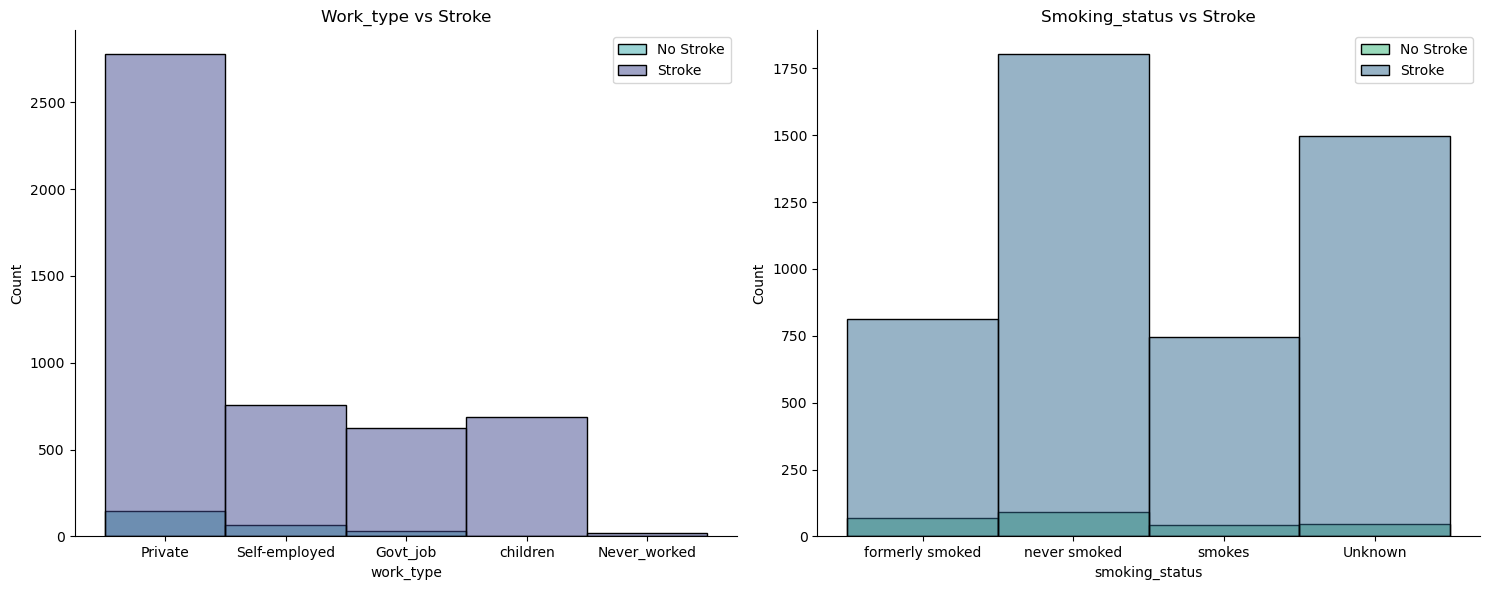

In [5]:
utils.plot_comparison('work_type', 'smoking_status', df_)

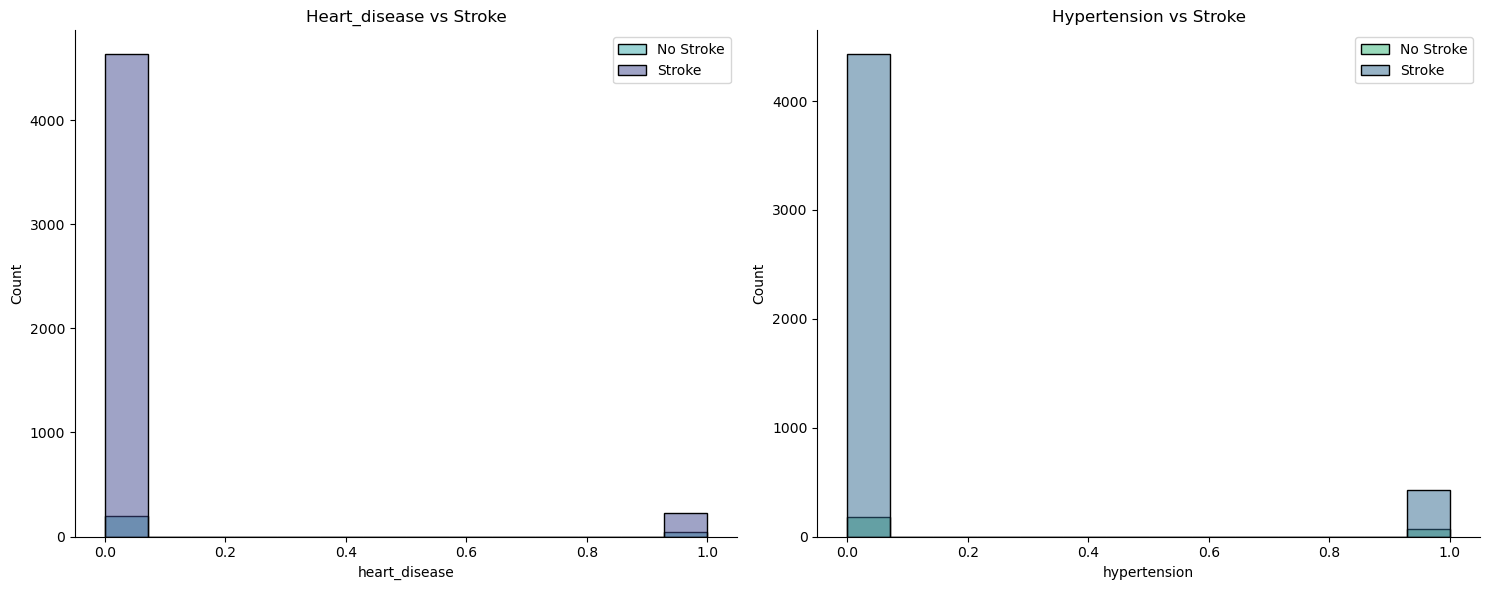

In [6]:
utils.plot_comparison('heart_disease', 'hypertension', df_)

looks like hypertension and heart diseas have little influence in stroke

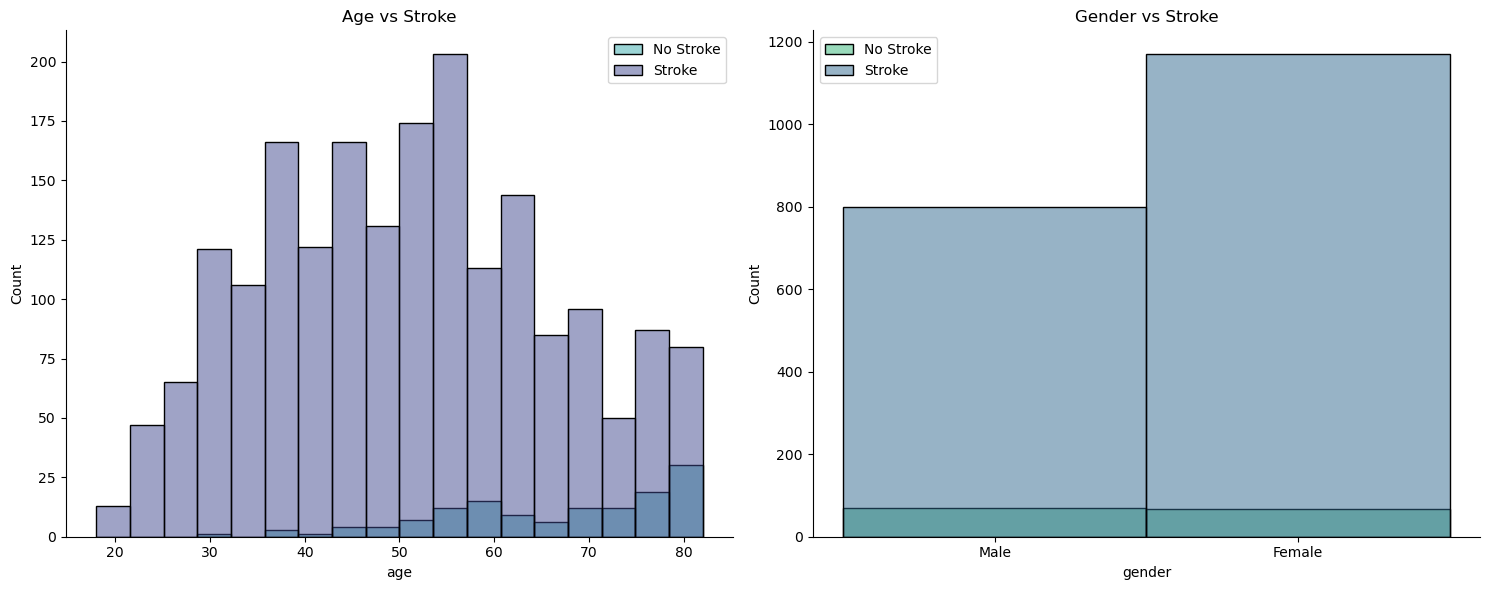

In [7]:
utils.plot_comparison('age', 'gender', df_[(df_['ever_married'] == 'Yes') & (df_['work_type'] == 'Private')])

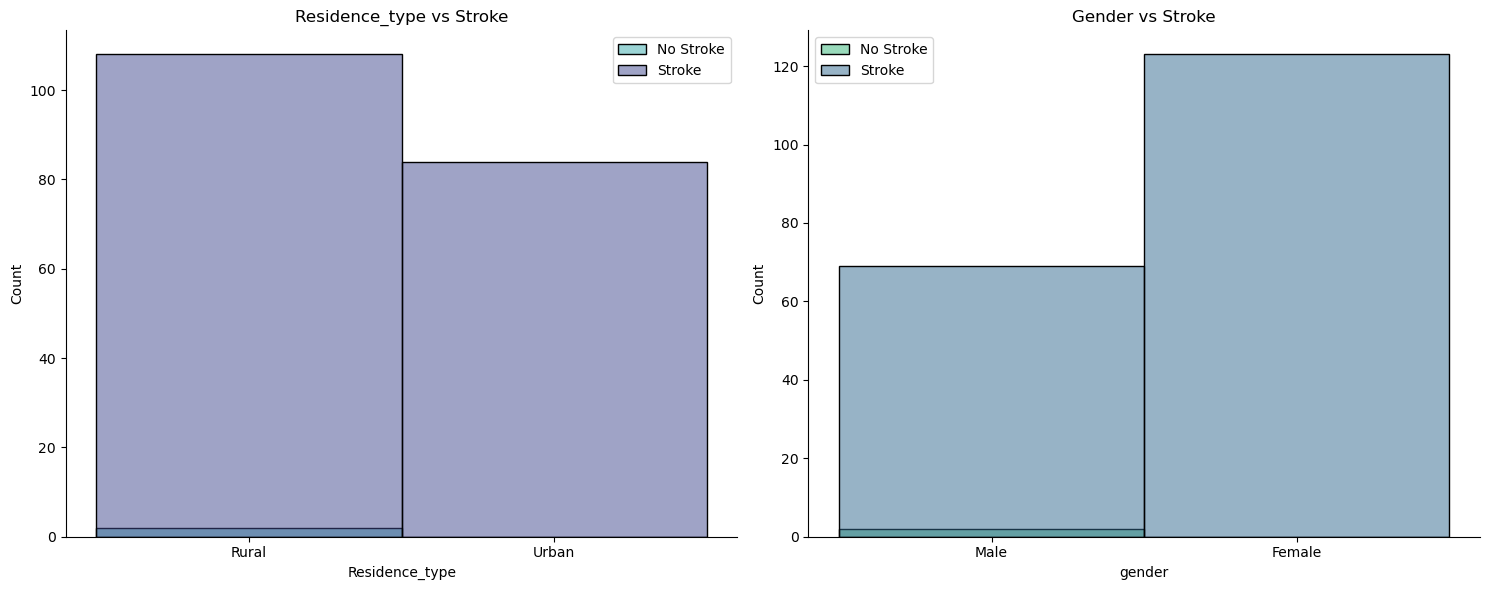

In [8]:
utils.plot_comparison('Residence_type', 'gender', df_[(df_['age'] >30) & (df_['age'] < 60)   & (df_['ever_married'] == 'No') & (df_['work_type'] == 'Private')] )

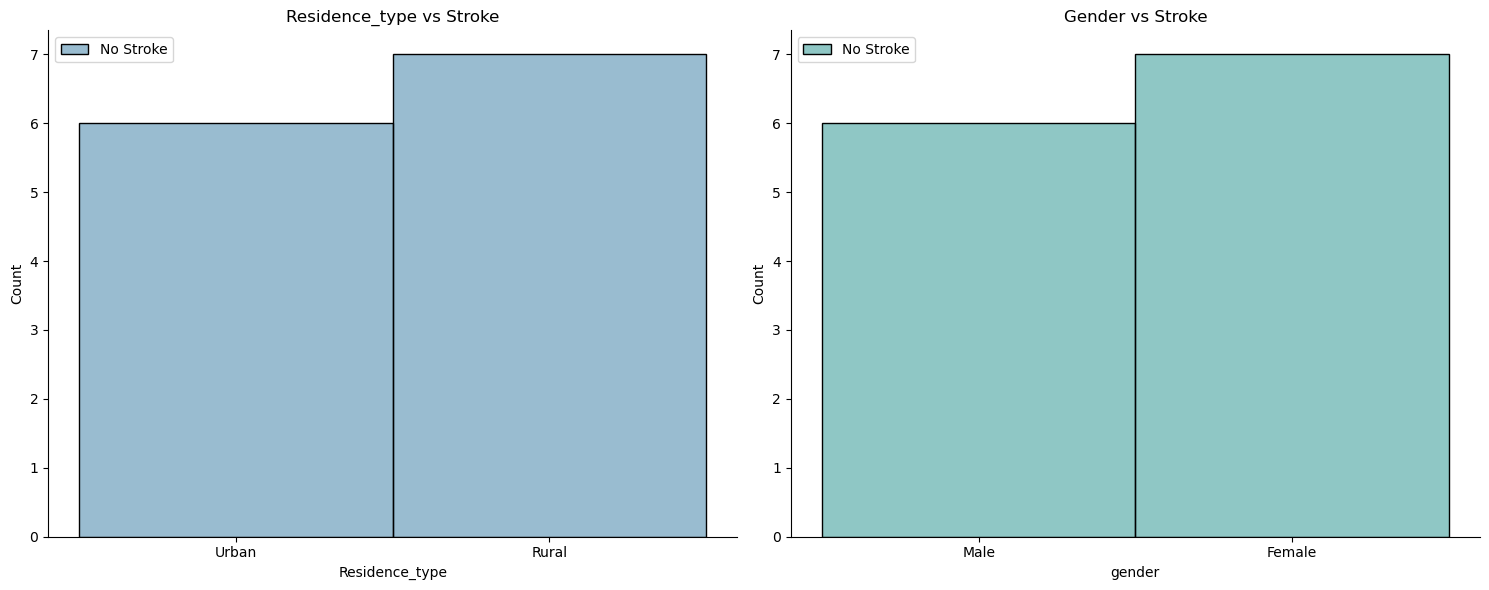

In [9]:
utils.plot_comparison('Residence_type', 'gender', df_[(df_['age'] >30) & (df_['age'] < 60) & (df_['hypertension'] == 1)  & (df_['ever_married'] == 'No') & (df_['work_type'] == 'Private')] )

No stroke in this sample

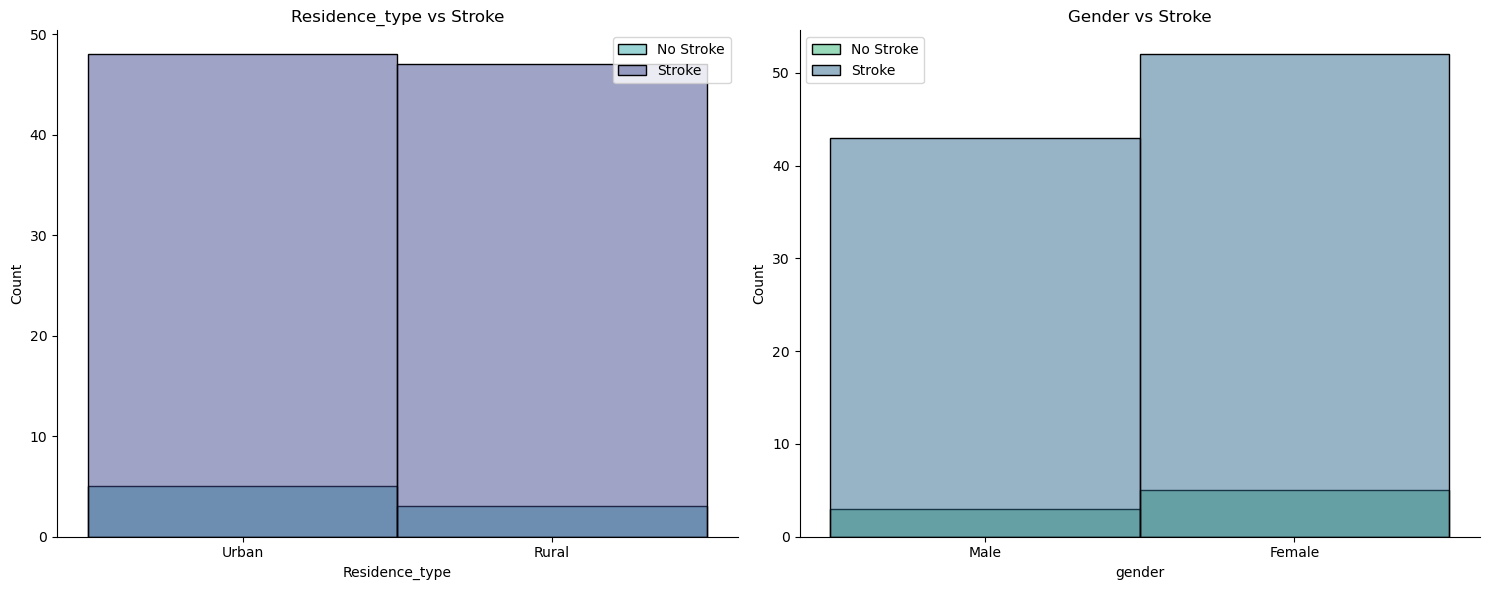

In [10]:
utils.plot_comparison('Residence_type', 'gender', df_[(df_['age'] >30) & (df_['age'] < 60) & (df_['hypertension'] == 1)  & (df_['ever_married'] == 'Yes') & (df_['work_type'] == 'Private')] )

looks like marriage causes stroke!

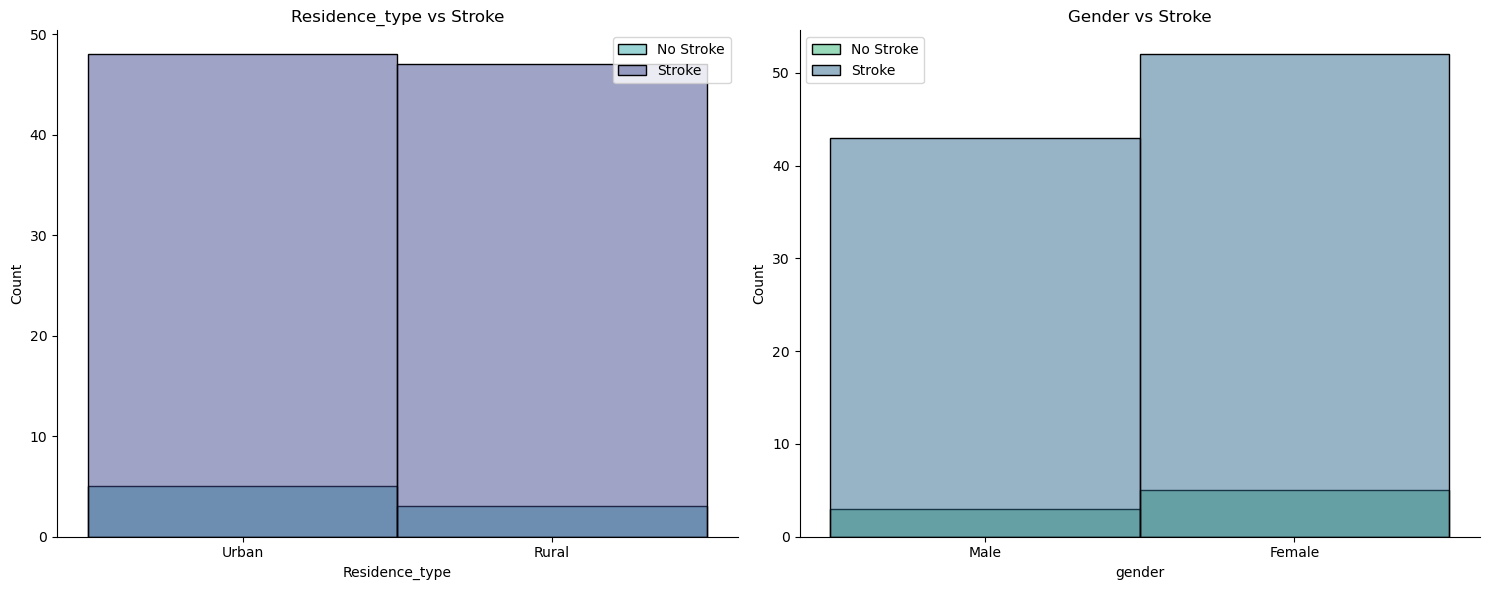

In [11]:
utils.plot_comparison('Residence_type', 'gender', df_[(df_['age'] >30) & (df_['age'] < 60) & (df_['hypertension'] == 1)  & (df_['ever_married'] == 'Yes') & (df_['work_type'] == 'Private')] )

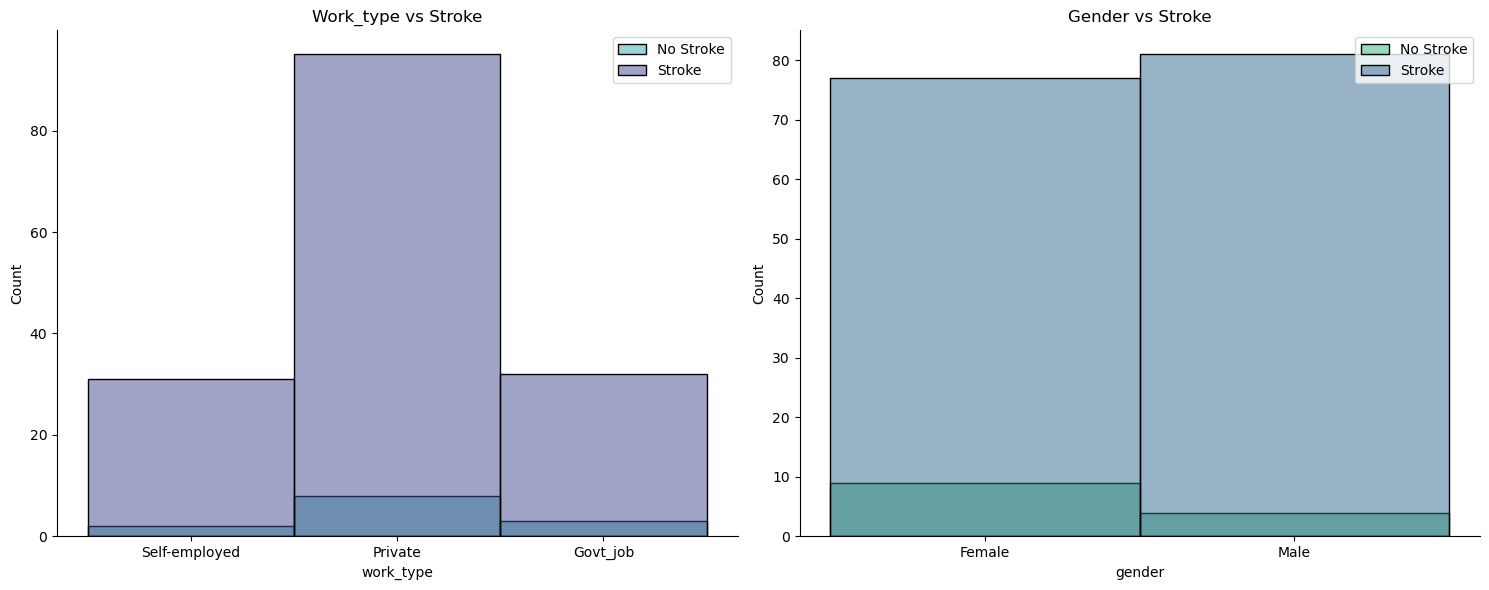

In [12]:
utils.plot_comparison('work_type', 'gender', df_[(df_['age'] > 30) & (df_['age'] < 60) & (df_['hypertension'] == 1) & (df_['ever_married'] == 'Yes')])


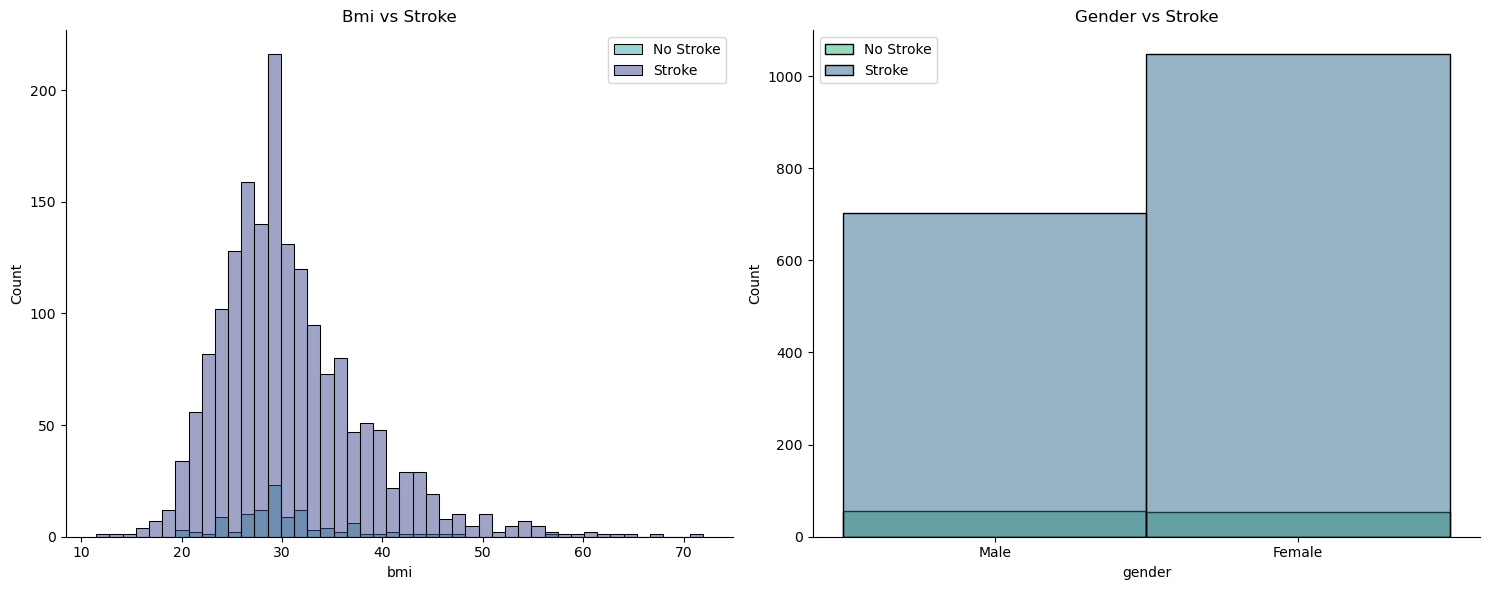

In [13]:
utils.plot_comparison('bmi', 'gender', df_[(df_['hypertension'] == 0) & (df_['ever_married'] == 'Yes') & (df_['work_type'] == 'Private')])

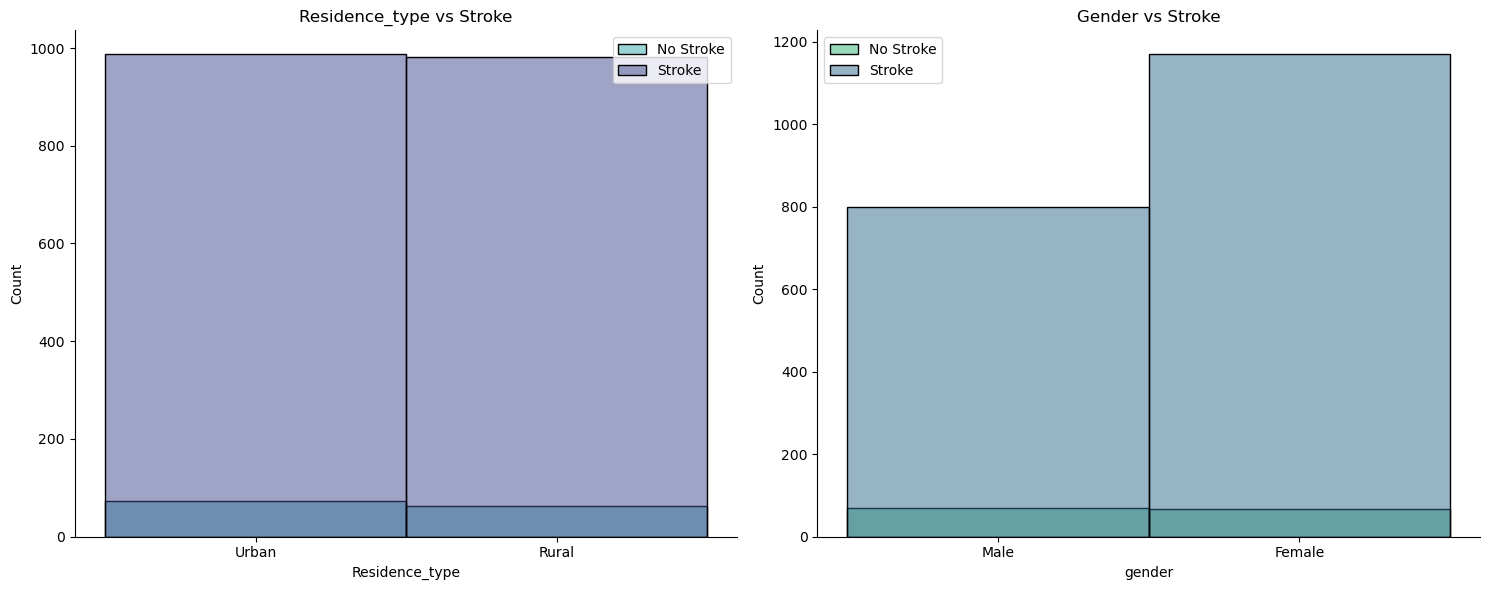

In [35]:
utils.plot_comparison('Residence_type', 'gender', df_[(df_['ever_married'] == 'Yes') & (df_['work_type'] == 'Private')])

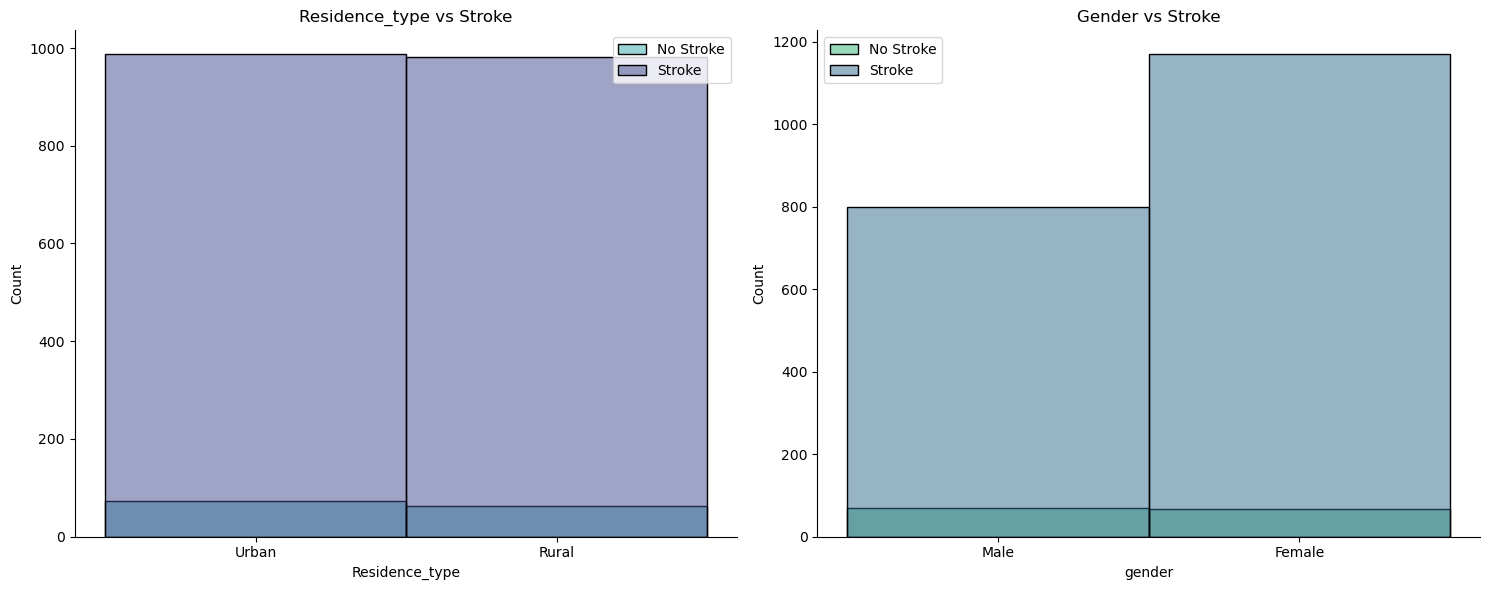

In [37]:
utils.plot_comparison('Residence_type', 'gender', df_[(df_['ever_married'] == 'Yes') & (df_['work_type'] == 'Private')])

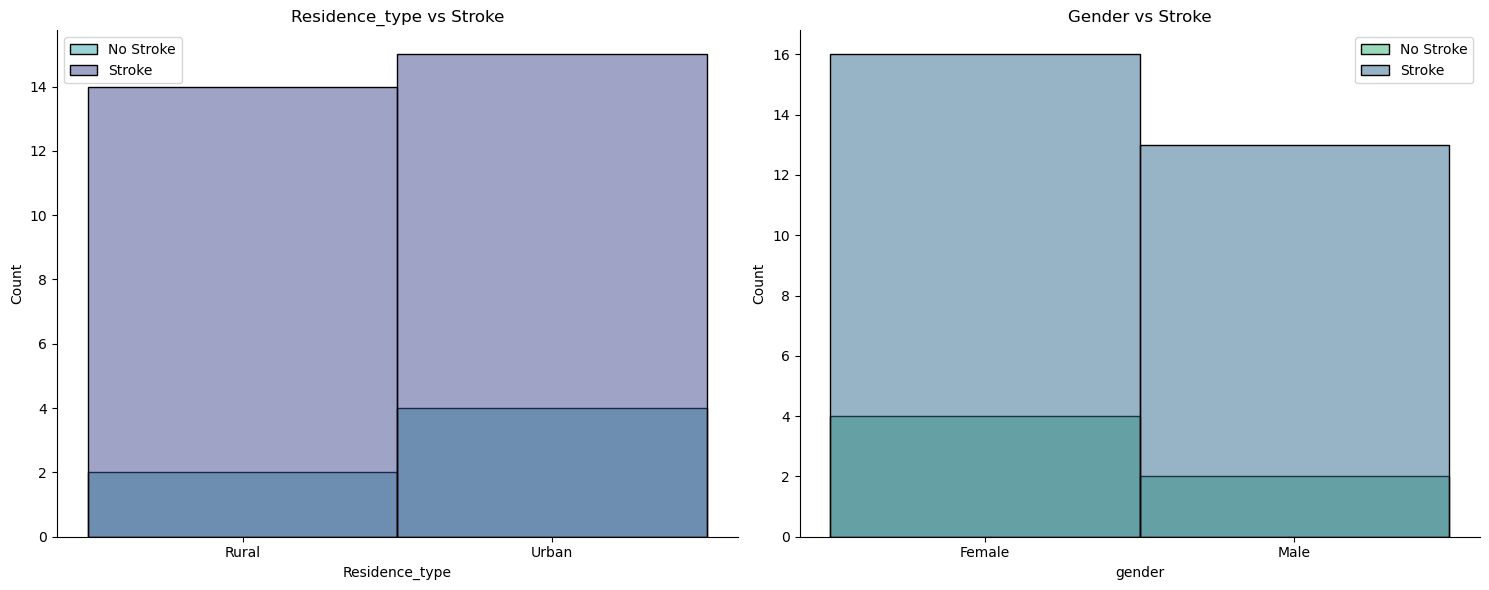

In [16]:
utils.plot_comparison('Residence_type', 'gender', df_[(df_['hypertension'] == 1) & (df_['ever_married'] == 'No') & (df_['work_type'] == 'Private')])

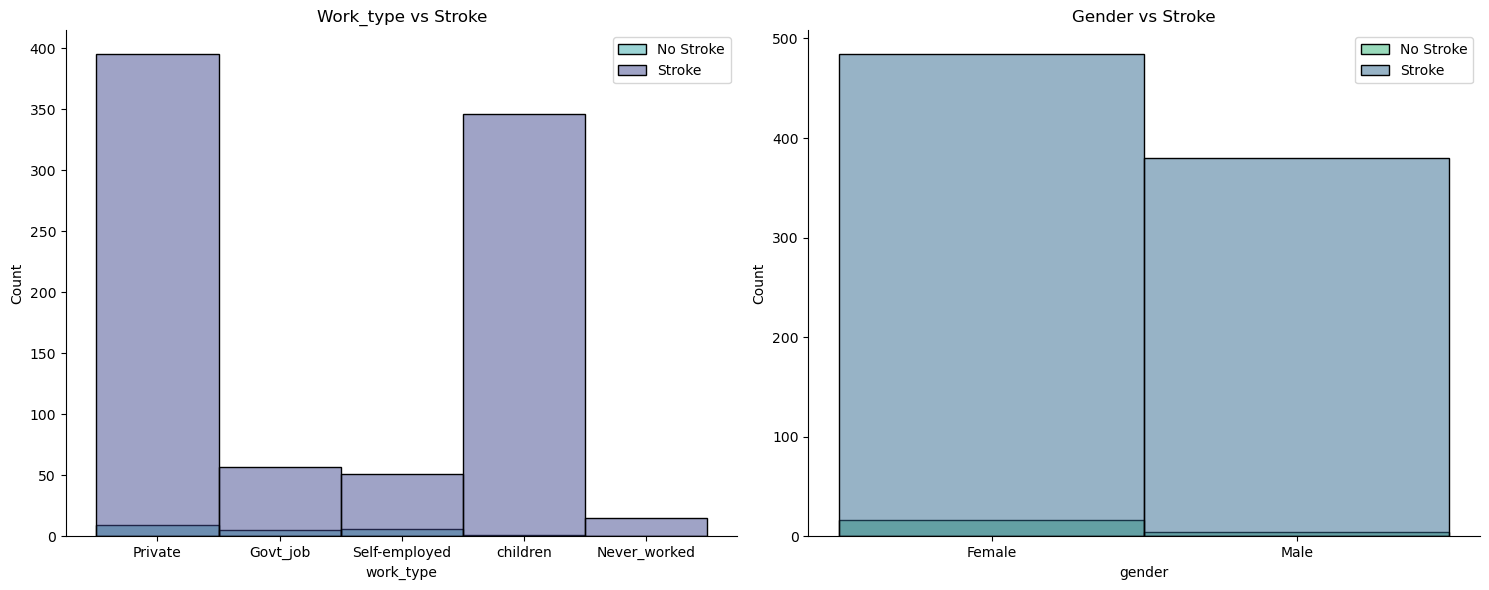

In [17]:
utils.plot_comparison('work_type', 'gender', df_[(df_['Residence_type'] == 'Urban') & (df_['ever_married'] == 'No')])



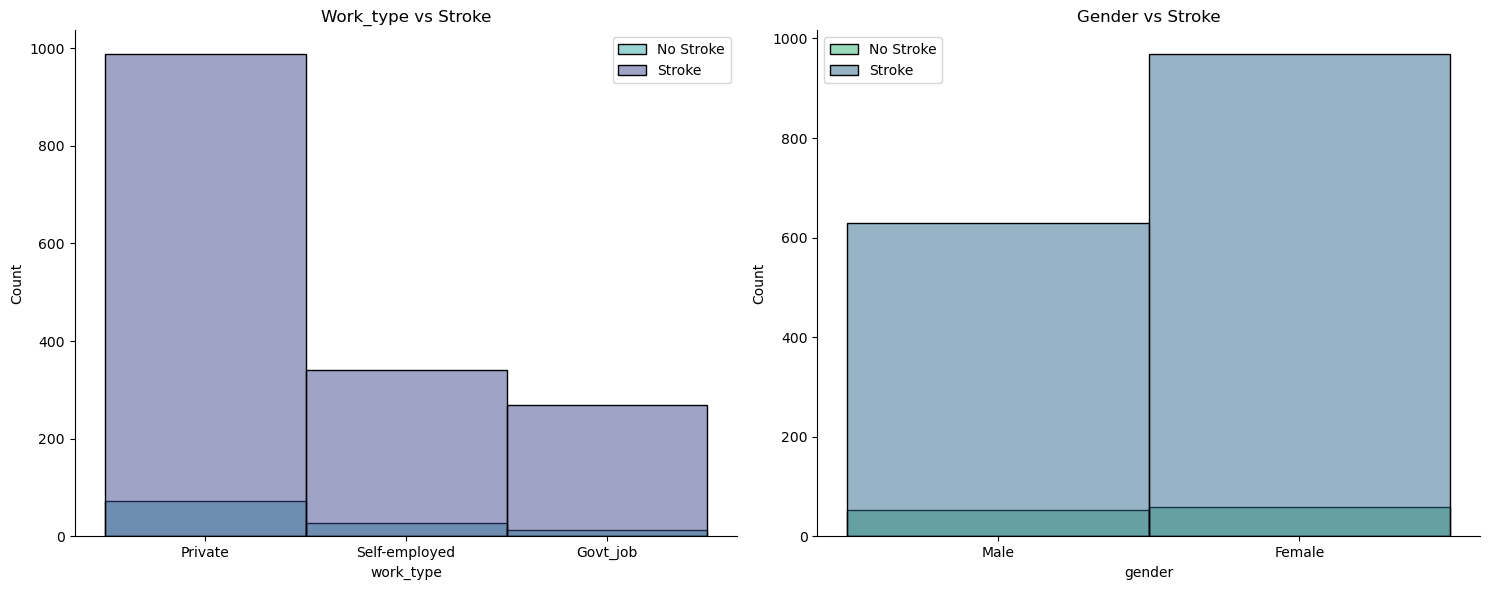

In [18]:
utils.plot_comparison('work_type', 'gender', df_[(df_['Residence_type'] == 'Urban') & (df_['ever_married'] == 'Yes')])


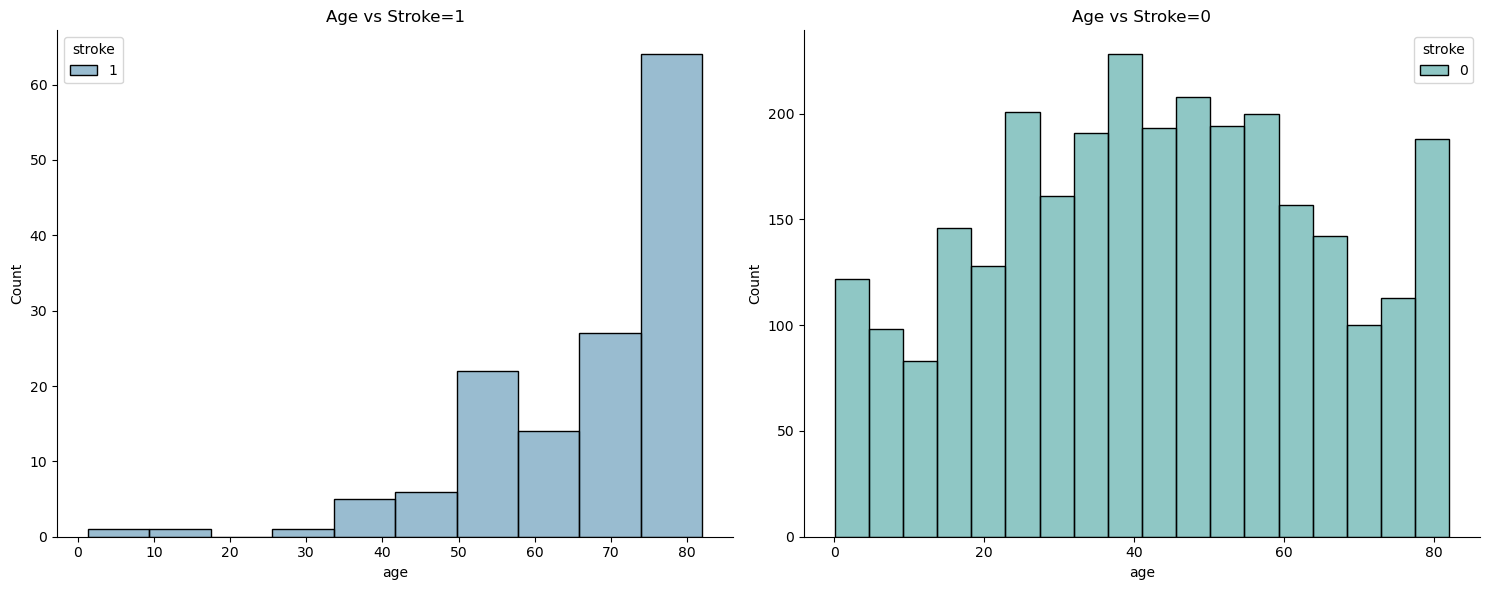

In [19]:
utils.plot_comparison_2('age', stroke[stroke['gender'] == 'Female'], no_stroke[no_stroke['gender'] == 'Female'] )

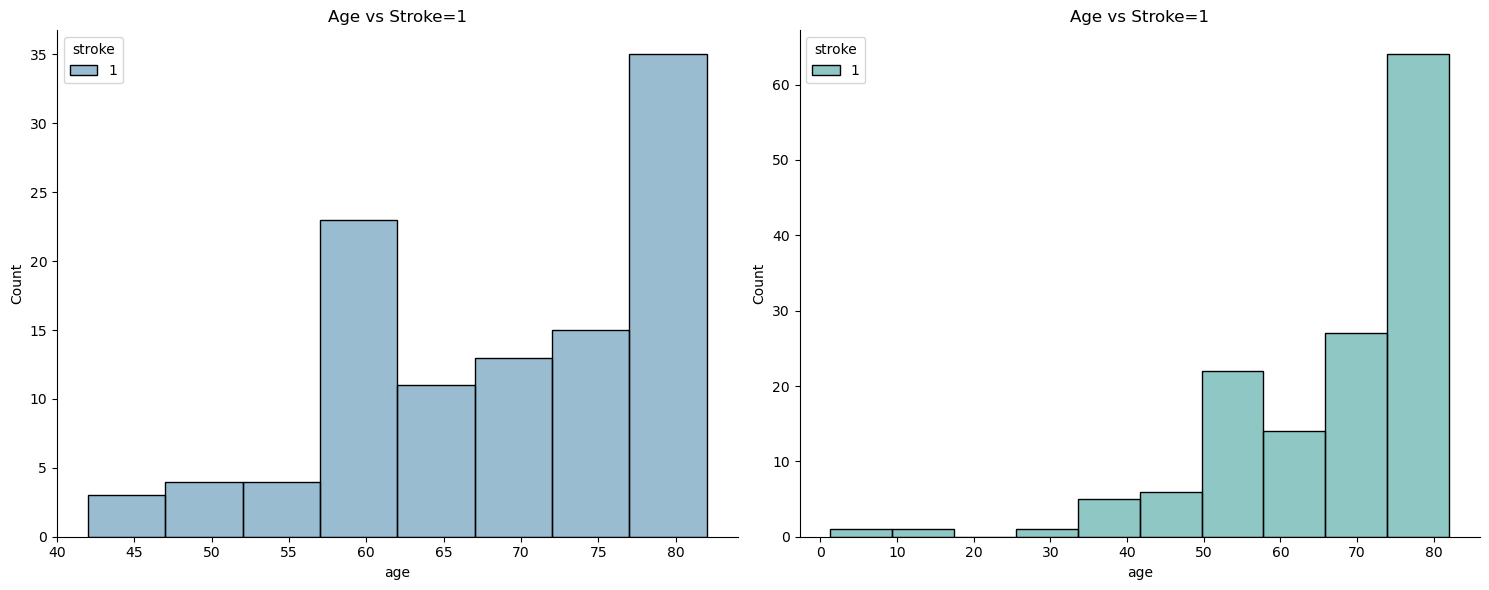

In [20]:
utils.plot_comparison_2('age', stroke[stroke['gender'] == 'Male'], stroke[stroke['gender'] == 'Female'] )

There are more samples for age in women with stroke than men

In [21]:
stroke[stroke['gender'] == 'Male'].shape

(108, 11)

In [22]:
stroke[stroke['gender'] == 'Female'].shape

(141, 11)

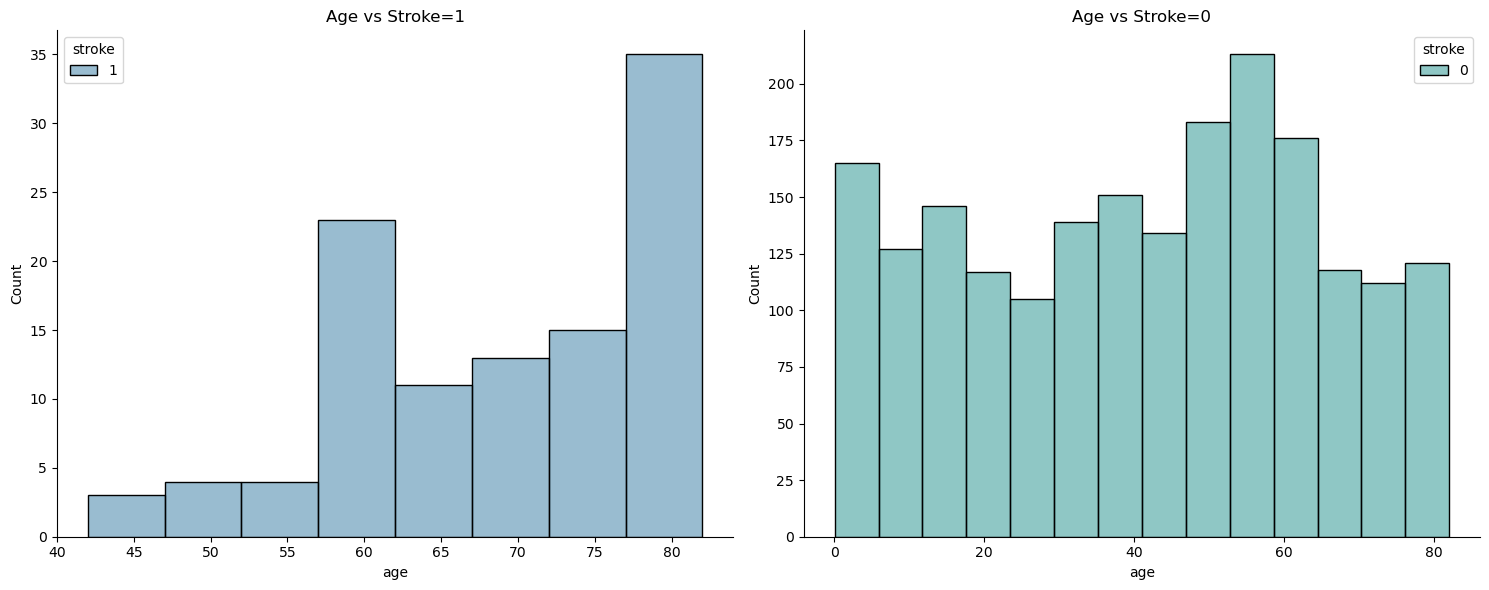

In [23]:
utils.plot_comparison_2('age', stroke[stroke['gender'] == 'Male'], no_stroke[no_stroke['gender'] == 'Male'] )

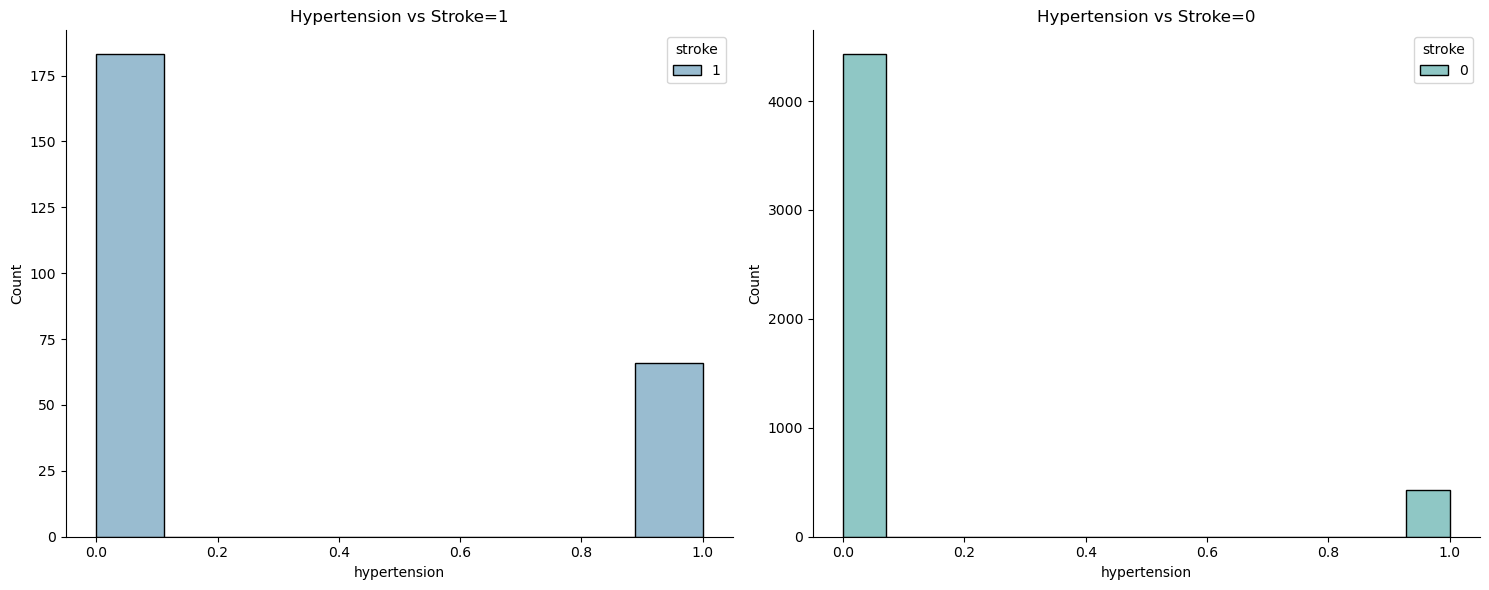

In [24]:
utils.plot_comparison_2('hypertension', stroke, no_stroke )

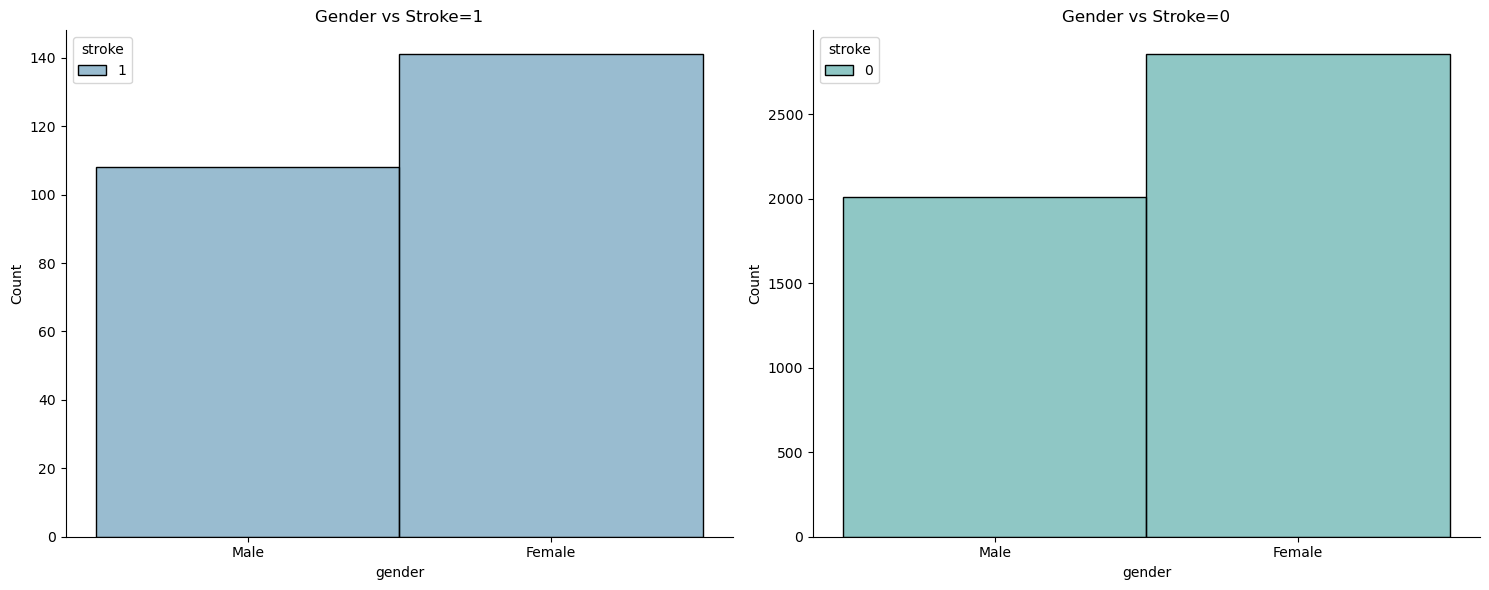

In [25]:
utils.plot_comparison_2('gender', stroke, no_stroke )

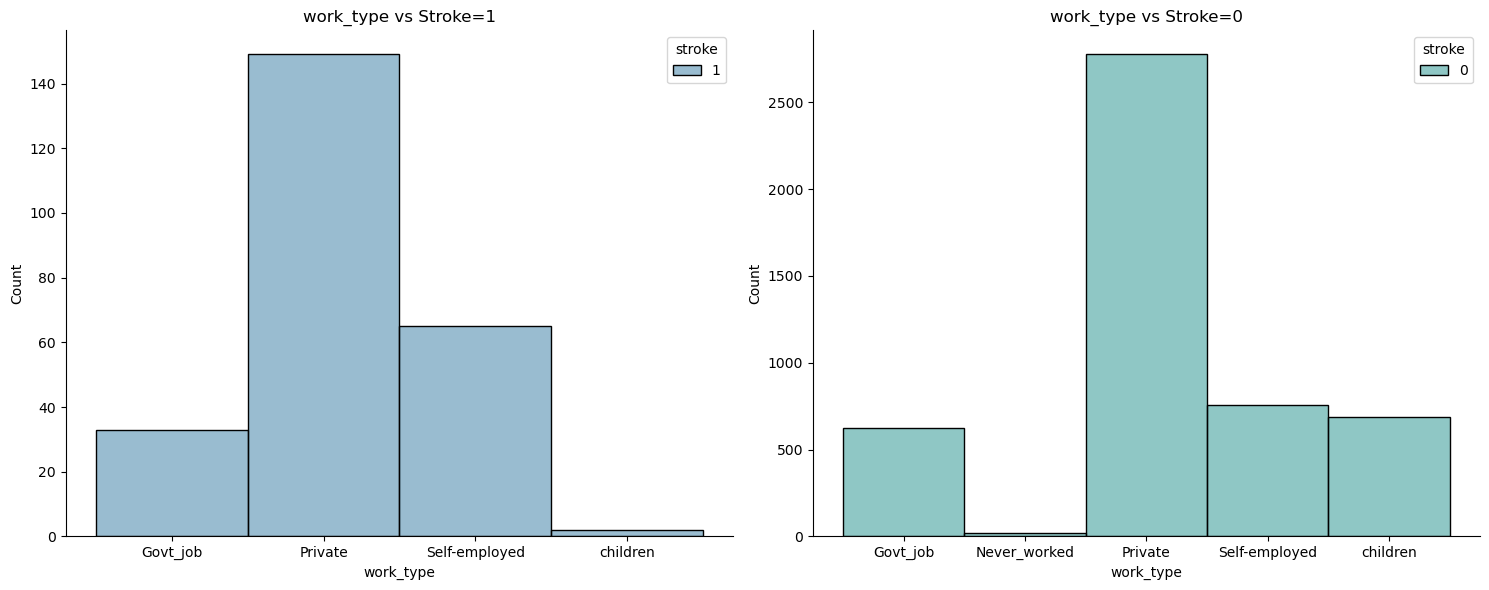

In [26]:

utils.plot_comparison_3('work_type', stroke, no_stroke)

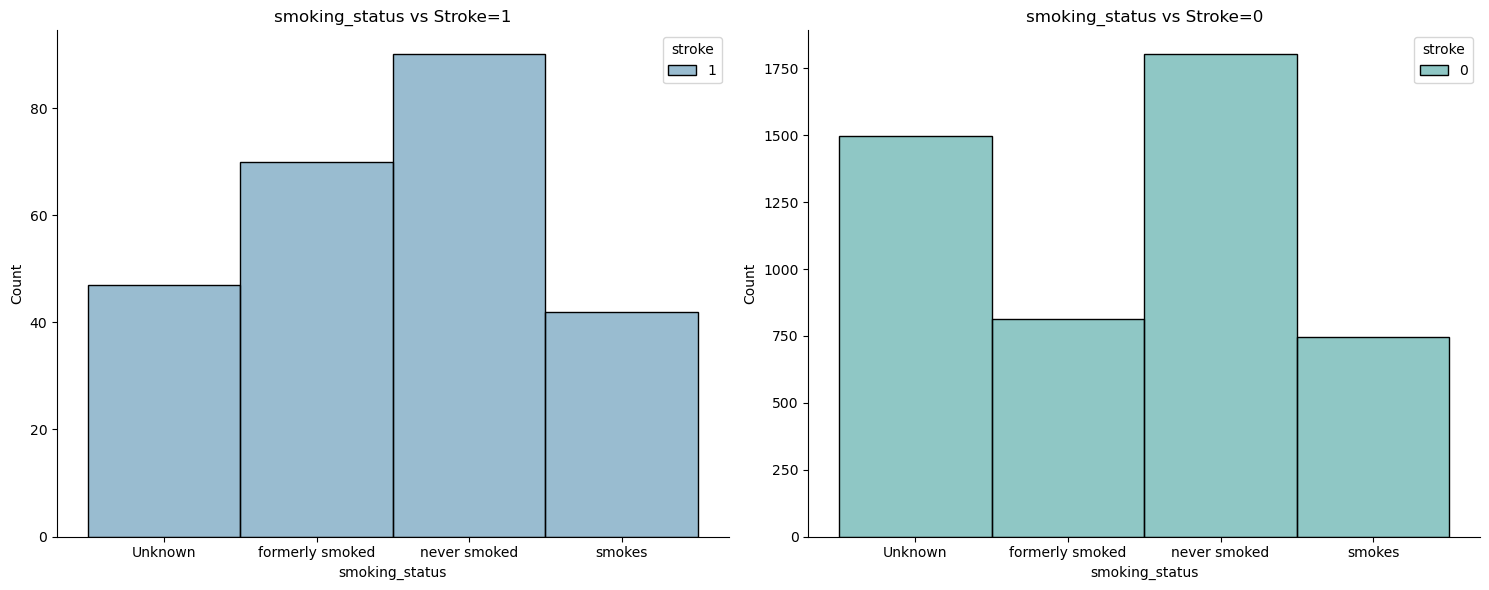

In [28]:

utils.plot_comparison_3('smoking_status', stroke, no_stroke)

Looks like smoking helps with stroke?

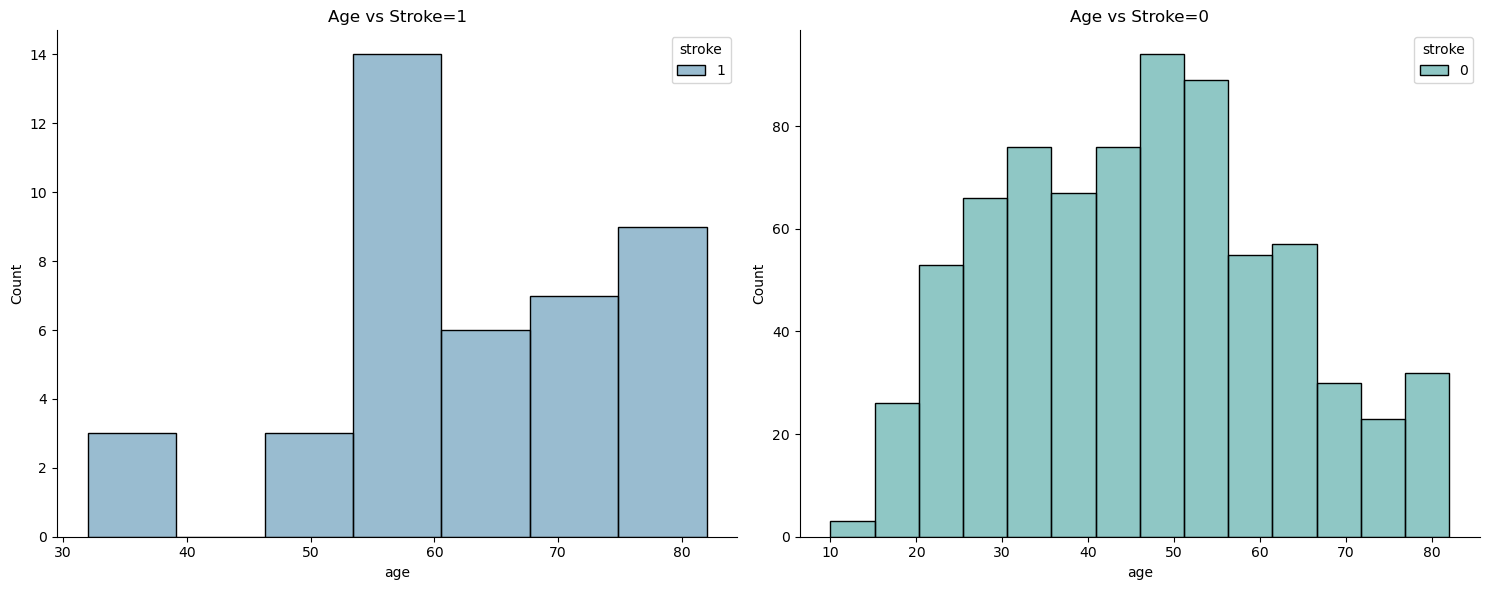

In [29]:
utils.plot_comparison_2('age' , stroke[stroke['smoking_status'] == 'smokes'] , no_stroke[no_stroke['smoking_status'] == 'smokes'])

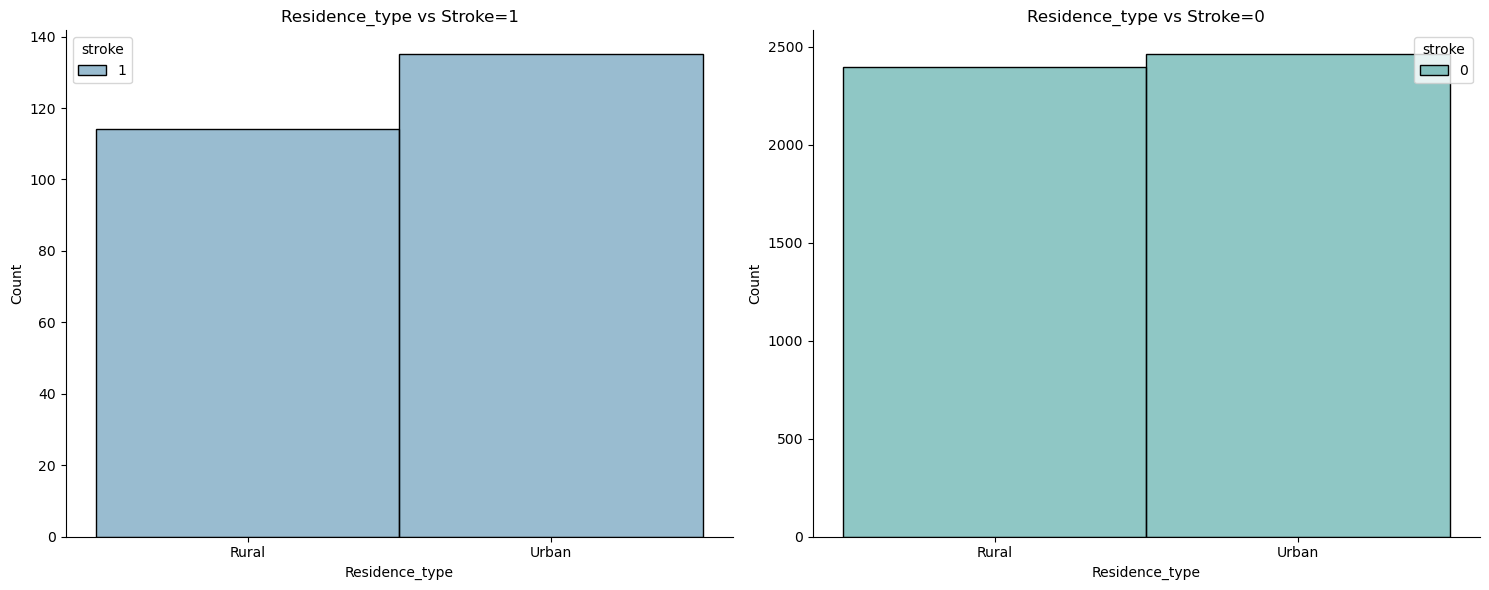

In [30]:
utils.plot_comparison_3('Residence_type', stroke, no_stroke)

In [32]:
highest_values = {}

for col in stroke.columns:
    if pd.api.types.is_numeric_dtype(stroke[col]):  
        highest_values[col] = stroke[col].max()  
    else:
        highest_count_category = stroke[col].value_counts().idxmax()  
        highest_values[col] = highest_count_category

print("Most At Risk Patient")
for col, value in highest_values.items():
    print(f"{col}: {value}")

Most At Risk Patient
gender: Female
age: 82.0
hypertension: 1
heart_disease: 1
ever_married: Yes
work_type: Private
Residence_type: Urban
avg_glucose_level: 271.74
bmi: 56.6
smoking_status: never smoked
stroke: 1


In conclusion, it can be observed that there is a relationship between categorical values, and thus I will leverage this with frequency encoding. 



There are some other questions that come to mind, such as who smokes more etc. these fall out of the scope of the project.

# References

In [34]:
'''

https://pythonfordatascienceorg.wordpress.com/independent-t-test-python/
https://www.pythonfordatascience.org/parametric-assumptions-python/
https://pythonfordatascienceorg.wordpress.com/welch-t-test-python-pandas/
https://www.kaggle.com/code/devghiles/step-by-step-solution-with-f1-score-as-a-metric

'''

'\n\nhttps://pythonfordatascienceorg.wordpress.com/independent-t-test-python/\nhttps://www.pythonfordatascience.org/parametric-assumptions-python/\nhttps://pythonfordatascienceorg.wordpress.com/welch-t-test-python-pandas/\nhttps://www.kaggle.com/code/devghiles/step-by-step-solution-with-f1-score-as-a-metric\n\n'